In [2]:
cd .. 

/home/jovyan/2018-W-450-4/06-hyper-parameter-tuning


In [3]:
run __init__.py

In [4]:
run src/load_data.py

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.metrics import accuracy_score, f1_score

In [7]:
!conda install tqdm --yes --quiet



Package plan for installation in environment /opt/conda:

The following packages will be UPDATED:

    tqdm: 4.19.6-py_0 conda-forge --> 4.19.8-py_0 conda-forge



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [9]:
adult_train_df = data['adult']['train']['engineered']
adult_train_target = data['adult']['train']['labels']

In [10]:
from time import time

In [11]:
def time_function_call(function):
    def wrapper(*args, **kwargs):
        start = time()
        result = function(*args, **kwargs)
        execution_time = time() - start
        return result, execution_time
    return wrapper

@time_function_call
def model_fit(model, X, y):
    return model.fit(X, y)

@time_function_call
def model_predict(model, X):
    return model.predict(X)

def run_model(model, model_name, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels)
    
    _, fit_time = model_fit(model, X_train, y_train)
    
    train_pred, train_pred_time = model_predict(model, X_train)
    
    test_pred, test_pred_time = model_predict(model, X_test)   
    
    return {
            'model' : model,
            'model_name' : model_name,
            'f1_train_score' : f1_score(y_train, train_pred),
            'f1_test_score' : f1_score(y_test, test_pred),
            'accuracy_train_score' : model.score(X_train, y_train),
            'accuracy_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

## F$_1$ Score by Penalty Type and C Value

In [12]:
test_results = []
c_values = np.logspace(-4,4,9)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

100%|██████████| 9/9 [00:02<00:00,  4.42it/s]


In [26]:
test_results_df = pd.DataFrame(test_results)

In [28]:
test_results_df['C'] = (test_results_df
                                .model
                                .apply(lambda model: model.C))

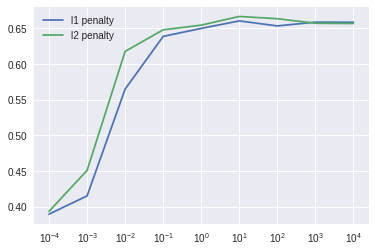

In [29]:
l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [30]:
test_results = []
c_values = np.logspace(-1,5,12)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

100%|██████████| 12/12 [00:02<00:00,  4.11it/s]


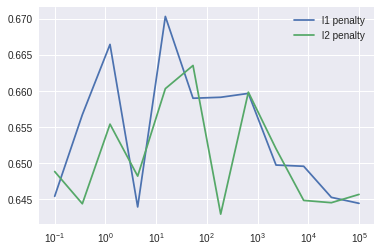

In [31]:
test_results_df = pd.DataFrame(test_results)

test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [32]:
test_results = []
c_values = np.logspace(-1,5,12)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

100%|██████████| 12/12 [00:02<00:00,  4.20it/s]


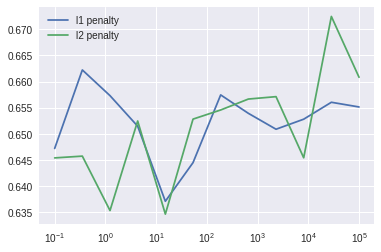

In [33]:
test_results_df = pd.DataFrame(test_results)

test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [34]:
test_results = []
c_values = np.logspace(-1,5,12)

for _ in range(10):
    for regularization_type in ['l1', 'l2']:
        for c in tqdm(c_values):
            model = LogisticRegression(penalty=regularization_type, C=c)
            test_result = run_model(model, 
                                    regularization_type, 
                                    adult_train_df, 
                                    adult_train_target)
            test_results.append(test_result)

100%|██████████| 12/12 [00:02<00:00,  4.04it/s]


In [35]:
test_results_df = pd.DataFrame(test_results)
test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)
l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']

In [36]:
from matplotlib.cm import viridis_r

In [37]:
k = int(len(viridis_r.colors)/12)
colors = [col for i, col in enumerate(viridis_r.colors) if i % 21 == 0]

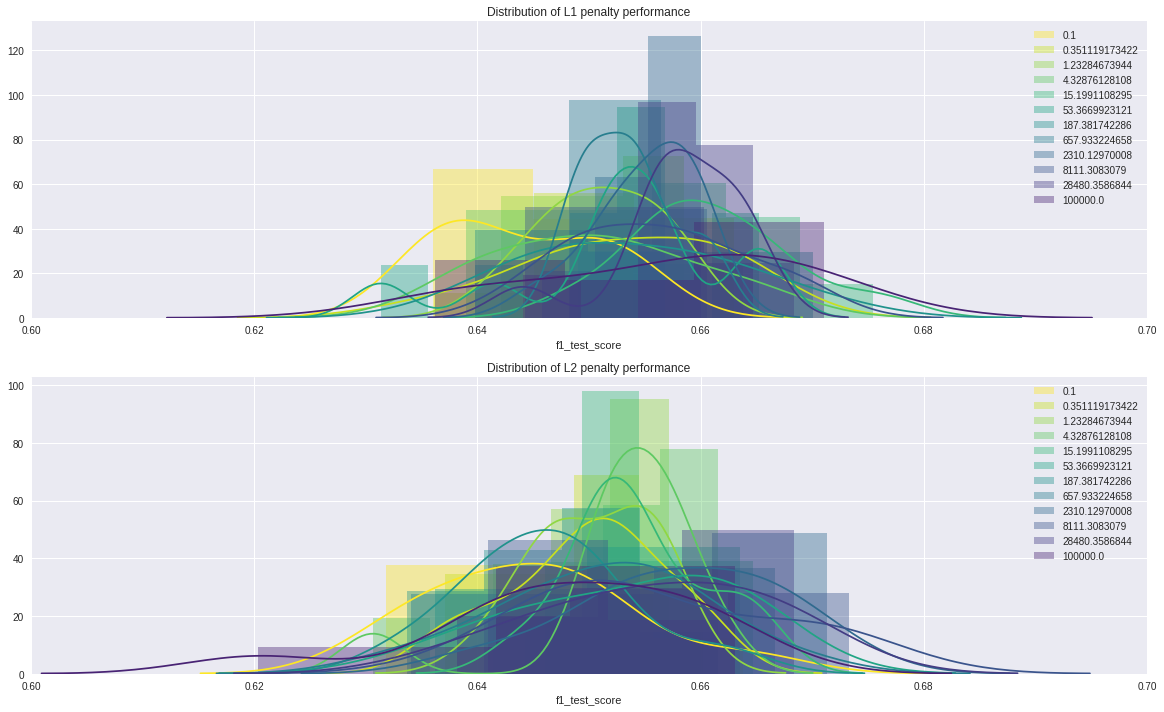

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,12))
for i, C in enumerate(l1_test_results.C.unique()): 
    l1_test_results_for_C = l1_test_results[l1_test_results.C == C]
    sns.distplot(l1_test_results_for_C.f1_test_score, label=str(C), ax=ax1, color=colors[i])
    l2_test_results_for_C = l2_test_results[l2_test_results.C == C]
    sns.distplot(l2_test_results_for_C.f1_test_score, label=str(C), ax=ax2, color=colors[i])
ax1.set_xlim(0.6,0.7)
ax1.set_title('Distribution of L1 penalty performance')
ax1.legend()
ax2.set_xlim(0.6,0.7)
ax2.set_title('Distribution of L2 penalty performance')
ax2.legend()


100%|██████████| 4/4 [00:01<00:00,  3.54it/s]


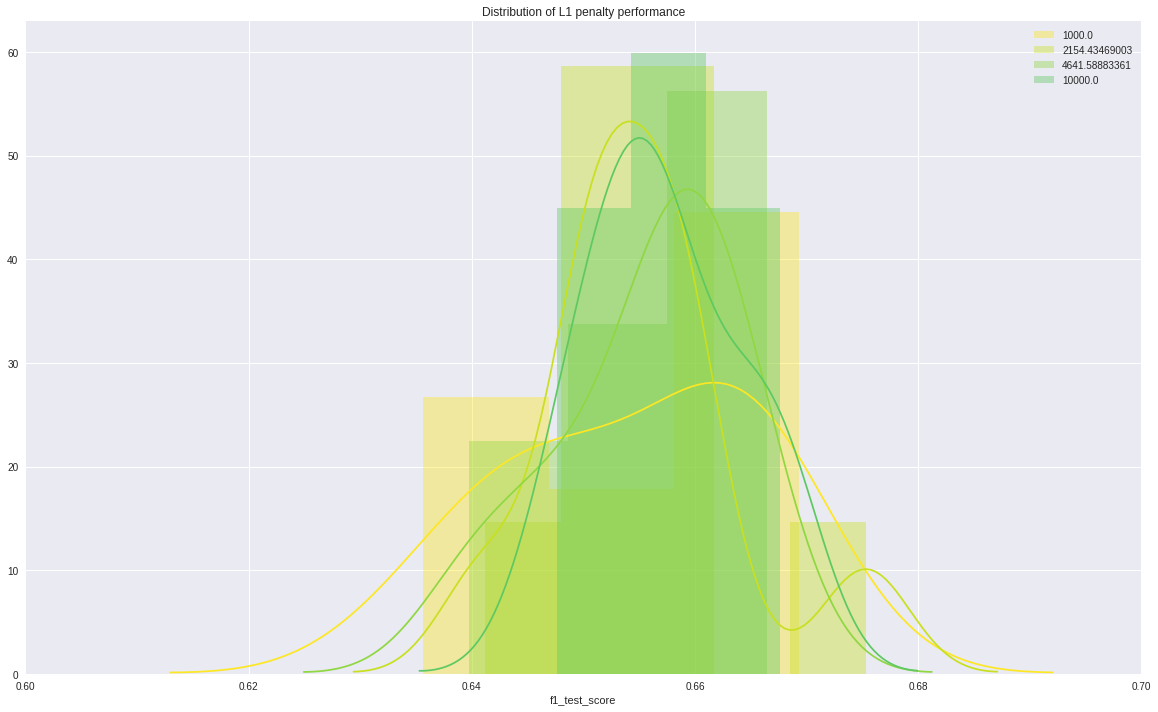

In [43]:
test_results = []
c_values = np.logspace(3,4,4)

for _ in range(10):
    for regularization_type in ['l1']:
        for c in tqdm(c_values):
            model = LogisticRegression(penalty=regularization_type, C=c)
            test_result = run_model(model, 
                                    regularization_type, 
                                    adult_train_df, 
                                    adult_train_target)
            test_results.append(test_result)

test_results_df = pd.DataFrame(test_results)
test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)
l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']

fig, (ax1) = plt.subplots(1,1,figsize=(20,12))
for i, C in enumerate(l1_test_results.C.unique()): 
    l1_test_results_for_C = l1_test_results[l1_test_results.C == C]
    sns.distplot(l1_test_results_for_C.f1_test_score, label=str(C), ax=ax1, color=colors[i])
ax1.set_xlim(0.6,0.7)
ax1.set_title('Distribution of L1 penalty performance')
ax1.legend()



In [13]:
test_results_df = pd.DataFrame(test_results)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree = DecisionTreeClassifier(max_depth=4)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.n_neighbors


5

In [19]:
list(range(10, 100, 10))

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [20]:
test_results_df['max_depth'] = (test_results_df
                                .model
                                .apply(lambda model: model.max_depth))

AttributeError: 'LogisticRegression' object has no attribute 'max_depth'